In [ ]:
#install libraries

!pip install xgboost lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=380837ab9477ab3bfdd725514a411c0ad7a56c37d3e81021882a4caa9ae9c486
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practicum Models/survival_episodes_cleaned.csv')
df

,randid,start_date,duration,event_observed,NOAAClimRegion,TempZone,HumidZone,bin_PlantSize_kW,plant_age_months,active_snow_tickets,snow_bin_ticket_minutes,snow_affected_assets,snow_production_level,snow_value_mm,total_daily_snow_mm,low_irradiation,cumulative_snow_mm,hurr_bin_ticket_minutes,hurr_affected_assets,hurr_production_level,HurricanePrep,HurricanePostInspection,hurricane,nearest_hurricane,wind_speed_mean,rain_value_mm,nearest_rain,storm_active_tickets,storm_bin_ticket_minutes,storm_affected_assets,storm_production_level,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain,weather_onset
0,C2S1,2018-10-13,1,1,West,T6,H4,large,25.0,No,NaN,NaN,Unknown,0.0,0.0,0,0.0,NaN,NaN,Unknown,No,No,0.0,354,2.677792,0.017805,0,No,NaN,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,1
1,C2S1,2018-11-22,3,1,West,T6,H4,large,27.0,No,NaN,NaN,Unknown,0.0,0.0,0,0.0,NaN,NaN,Unknown,No,No,0.0,354,4.930521,1.136330,0,No,NaN,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,1
2,C2S1,2018-11-29,3,1,West,T6,H4,large,27.0,No,NaN,NaN,Unknown,0.0,0.0,1,0.0,NaN,NaN,Unknown,No,No,0.0,354,5.715604,8.015464,0,No,NaN,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,1
3,C2S1,2018-11-30,2,1,West,T6,H4,large,27.0,No,NaN,NaN,Unknown,0.0,0.0,1,0.0,NaN,NaN,Unknown,No,No,0.0,354,7.684687,0.239059,0,No,NaN,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,1
4,C2S1,2018-12-05,2,1,West,T6,H4,large,27.0,No,NaN,NaN,Unknown,0.0,0.0,1,0.0,NaN,NaN,Unknown,No,No,0.0,354,1.672604,0.396306,0,No,NaN,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7266,P2S1,2019-03-08,3,1,West,T1,H2,large,2.0,No,NaN,NaN,Unknown,0.0,0.0,0,0.0,NaN,NaN,Unknown,No,No,0.0,354,4.936458,0.425360,0,No,NaN,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,1
7267,P2S1,2019-03-20,10,1,West,T1,H2,large,2.0,No,NaN,NaN,Unknown,0.0,0.0,0,0.0,NaN,NaN,Unknown,No,No,0.0,354,3.394271,1.412394,0,No,NaN,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,1
7268,P2S1,2019-03-21,9,1,West,T1,H2,large,2.0,No,NaN,NaN,Unknown,0.0,0.0,0,0.0,NaN,NaN,Unknown,No,No,0.0,354,4.167917,3.042049,0,No,NaN,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,1
7269,P2S1,2019-03-22,8,1,West,T1,H2,large,2.0,No,NaN,NaN,Unknown,0.0,0.0,0,0.0,NaN,NaN,Unknown,No,No,0.0,354,4.028187,0.000410,0,No,NaN,NaN,Unknown,0,0.0,0,2420,0.0,0,2255,1.0,1


In [ ]:
X = df.drop(columns=["duration", "event_observed", "start_date", "randid"])
y_time = df["duration"]
y_event = df["event_observed"]

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test, event_train, event_test = train_test_split(
    X_encoded, y_time, y_event, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, event_train.shape, event_test.shape

((5816, 58), (1455, 58), (5816,), (1455,), (5816,), (1455,))

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

params = {
    "objective": "survival:cox",
    "learning_rate": 0.01,
    "max_depth": 12,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "eval_metric": "cox-nloglik"
}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=[(dtrain, "train")],
    verbose_eval=20
)

[0]	train-cox-nloglik:7.68044
[20]	train-cox-nloglik:7.55276
[40]	train-cox-nloglik:7.45270
[60]	train-cox-nloglik:7.37198
[80]	train-cox-nloglik:7.30200
[100]	train-cox-nloglik:7.24238
[120]	train-cox-nloglik:7.19001
[140]	train-cox-nloglik:7.14359
[160]	train-cox-nloglik:7.10193
[180]	train-cox-nloglik:7.06577
[200]	train-cox-nloglik:7.03060
[220]	train-cox-nloglik:6.99813
[240]	train-cox-nloglik:6.96818
[260]	train-cox-nloglik:6.94079
[280]	train-cox-nloglik:6.91501
[300]	train-cox-nloglik:6.89031
[320]	train-cox-nloglik:6.86748
[340]	train-cox-nloglik:6.84540
[360]	train-cox-nloglik:6.82485
[380]	train-cox-nloglik:6.80620
[400]	train-cox-nloglik:6.78772
[420]	train-cox-nloglik:6.77050
[440]	train-cox-nloglik:6.75230
[460]	train-cox-nloglik:6.73520
[480]	train-cox-nloglik:6.71955
[499]	train-cox-nloglik:6.70524


In [ ]:
#risk scores (lower = higher risk)
preds = model.predict(dtest)

c_index = concordance_index(y_test, -preds, event_observed=event_test)
print("XGBoost Cox Test C-index:", round(c_index, 4))

XGBoost Cox Test C-index: 0.8426


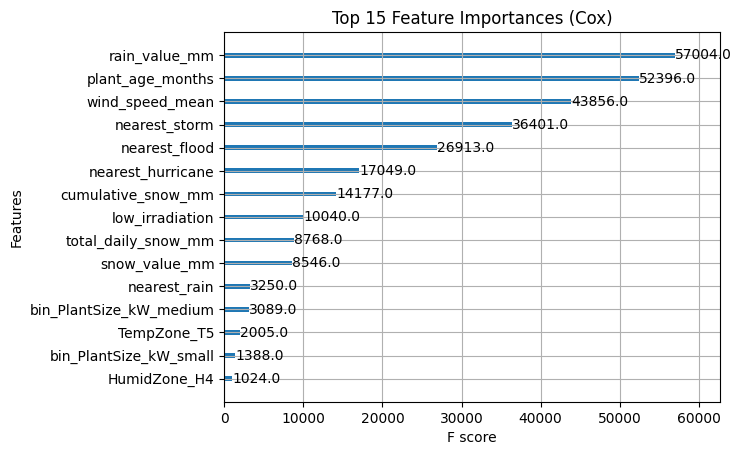

In [ ]:
xgb.plot_importance(model, max_num_features=15)
plt.title("Top 15 Feature Importances (Cox)")
plt.show()